In [1]:
# Do not delete this cell. It ensures that you can do the imports,
# load datasets etc. in the same fashion as in any Python script
# in the project template.

%matplotlib inline

import sys
sys.path.insert(0, '../..')
from bld.project_paths import project_paths_join as ppj
from bld.project_paths import project_paths as pp



In [2]:
from qpricesim.simulations.utils_simulation import gen_price_combination_byte_mappings
from qpricesim.simulations.utils_simulation import gen_possible_prices
from qpricesim.simulations.utils_simulation import price_state_to_int_state
from qpricesim.simulations.utils_simulation import int_state_to_price_state

In [3]:
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class PlaySimulation:
    def __init__(self, parameter_base, best_agent, inital_int_state, two_algo):
        self.best_agent = best_agent
        self.max_price = parameter_base['max_price']
        self.min_price = parameter_base['min_price']
        
        
        
        mappings = gen_price_combination_byte_mappings(parameter=parameter_base)
        self.prices_to_int_dict = mappings[0]
        self.int_to_prices_dict = mappings[1]
        
        self.price_array = gen_possible_prices(parameter=parameter_base)
        
        self.n_agents = parameter_base['n_agent']
        
        if self.n_agents == 2:
            self.two_algo = False
        else:
            self.two_algo = two_algo
        

        self.price_state = int_state_to_price_state(int_state=inital_int_state,
                                                    int_to_prices_dict=self.int_to_prices_dict)
        if self.two_algo:
            self.player_buffer = [self.price_state[-1]]
            self.agent_buffer = [self.price_state[:1]]     
        else:
            self.player_buffer = [self.price_state[1:]]
            self.agent_buffer = [self.price_state[0]]     
    def play(self, player_price):
        state = price_state_to_int_state(price_state=self.price_state,
                                         prices_to_int_dict=self.prices_to_int_dict)
        
        agent_action = self.best_agent.get_best_action(state)
        
        # Agent price is picked here twice
        agent_price = self.price_array[agent_action]
        
        if self.n_agents == 2:
            self.price_state = np.array([agent_price, player_price])
        elif self.n_agents == 3:
            if self.two_algo:
                self.price_state = np.array([agent_price, agent_price, player_price])
            else:
                self.price_state = np.array([agent_price, player_price[0], player_price[1]])
        
        self.agent_buffer.append(agent_price)
        self.player_buffer.append(player_price)
        
        if self.n_agents == 2:
            plt.plot(self.player_buffer, label='Price Human')
            plt.plot(self.agent_buffer, label = 'algo Price')
        elif self.n_agents == 3:
            if self.two_algo:
                plt.plot(self.player_buffer, label='Price Human')
                plt.plot(self.agent_buffer, label= 'Price Agent 1')
                plt.plot(self.agent_buffer, label= 'Price Agent 2')
            else:
                p_1, p_2 = zip(*self.player_buffer)
                plt.plot(p_1, label= 'Price Human 1')
                plt.plot(p_2, label= 'Price Human 2')
                plt.plot(self.agent_buffer, label= 'Price Agent')
                
        plt.ylim([self.min_price -1 , self.max_price + 1])
        plt.legend()

In [5]:
N_AGENTS = 2

In [6]:
with open(ppj(f"IN_SIMULATION_{N_AGENTS}_AGENT", f"experiment_super_star_{N_AGENTS}_agent.pickle"), "rb") as f:
    super_star_output = pickle.load(f)

In [7]:
with open(ppj("IN_SIMULATION_PARAMETER", f"parameter_{N_AGENTS}_agent_base.json"), "r") as f:
    parameter_base = json.load(f)

In [8]:
super_star_agent = super_star_output[0]

In [9]:
state_of_convergence = super_star_output[-2]

In [10]:
play_sim = PlaySimulation(parameter_base=parameter_base,
               best_agent=super_star_agent,
               inital_int_state=state_of_convergence,
               two_algo=True)

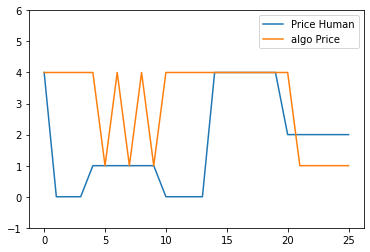

In [35]:
play_sim.play(2)